### 군집화(Clustering)
: 비지도학습으로 정답 없이 특징만 주어진 데이터를 묶어 그룹으로 분류하는 기법

#### 키와 몸무게로 학생들을 3그룹으로 분류

In [395]:
import warnings
warnings.filterwarnings('ignore')

In [396]:
import pandas as pd

In [397]:
df = pd.read_csv('../Data/student_kmeans.csv')
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

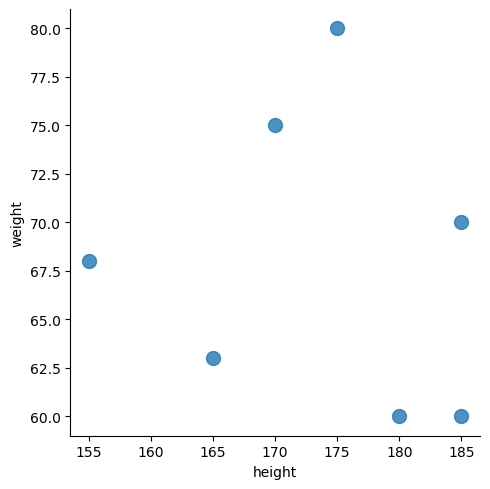

In [399]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}
)

plt.show()

In [400]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]], dtype=int64)

In [401]:
from sklearn.cluster import KMeans

In [402]:
# 3가지로 분류
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.values)

KMeans(n_clusters=3)

In [403]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[172.5       ,  77.5       ],
       [160.        ,  65.5       ],
       [183.33333333,  63.33333333]])

In [404]:
# 군집 번호
kmeans.labels_  # 뒤에 언더바 붙는거는 시스템에서 쓰는 변수

array([2, 2, 2, 1, 1, 0, 0])

In [405]:
# 데이터가 어느 군집에 소속되어 있는지 데이터프레임에 컬럼으로 추가
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,2
1,180,60,2
2,185,70,2
3,165,63,1
4,155,68,1
5,170,75,0
6,175,80,0


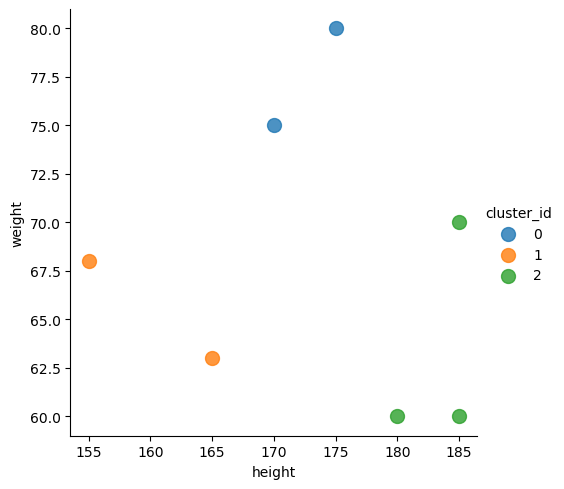

In [406]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)

plt.show()

### IRIS 군집화

In [407]:
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [408]:
# Name을 숫자로 변환
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
print(iris.head())
print(iris.tail())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name  label
0          5.1         3.5          1.4         0.2  Iris-setosa      0
1          4.9         3.0          1.4         0.2  Iris-setosa      0
2          4.7         3.2          1.3         0.2  Iris-setosa      0
3          4.6         3.1          1.5         0.2  Iris-setosa      0
4          5.0         3.6          1.4         0.2  Iris-setosa      0
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name  label
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2


In [409]:
# 정답을 제외한 데이터셋
iris2 = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
print(iris2.head())
print(iris2.tail())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
     SepalLength  SepalWidth  PetalLength  PetalWidth
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8


In [410]:
# K-means 군집화
kmeans = KMeans(n_clusters=3).fit(iris2.values)

In [411]:
# 중심점
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [412]:
# 군집표시
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [413]:
iris.iloc[[0,51,102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,2
102,7.1,3.0,5.9,2.1,Iris-virginica,2,1


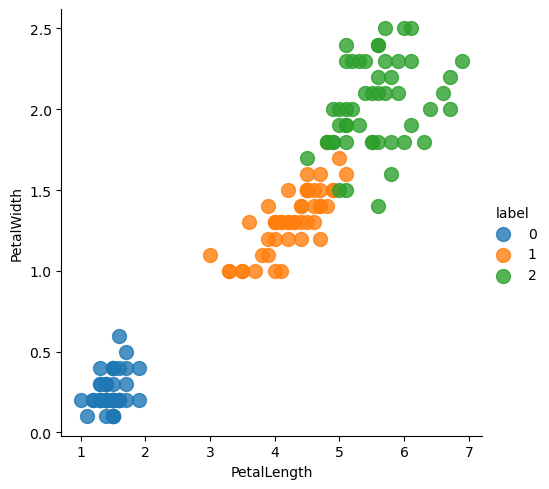

In [414]:
# label을 시각화
sns.lmplot(
    x='PetalLength',
    y='PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='label'
)

plt.show()

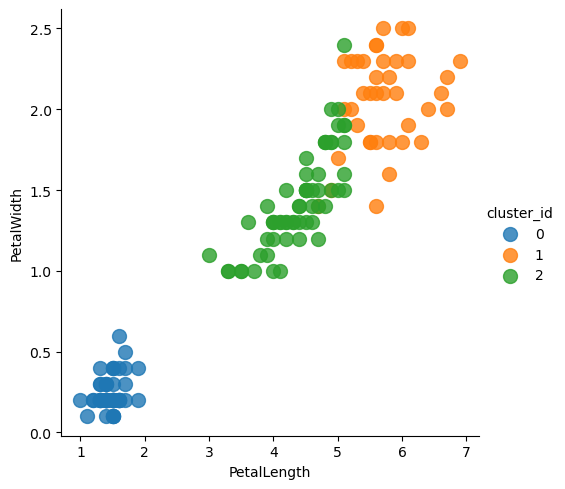

In [415]:
# cluster_id를 시각화
sns.lmplot(
    x='PetalLength',
    y='PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)

plt.show()

### 정확도 측정

In [416]:
from sklearn.metrics import accuracy_score

In [417]:
accuracy_score(iris.label, iris.cluster_id)

0.44666666666666666

상기의 그래프를 보니 정확도를 측정하려면 cluster_id의 1->2, 2->1으로 변경해야 한다.   
작업: 2 -> 3, 1 -> 2, 3 -> 1

In [418]:
# 1 -> 3으로 변경
iris.loc[iris.cluster_id == 2, 'cluster_id'] = 3
iris.loc[iris.cluster_id == 1, 'cluster_id'] = 2
iris.loc[iris.cluster_id == 3, 'cluster_id'] = 1


In [419]:
iris.iloc[[0,51,102], :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,1,1
102,7.1,3.0,5.9,2.1,Iris-virginica,2,2


In [420]:
accuracy_score(iris.label, iris.cluster_id)

0.8866666666666667